<a href="https://colab.research.google.com/github/mb16biswas/deep_lrn/blob/main/deep_07_08_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
base_dir = "/content/drive/MyDrive/SiPakMed"
train_dir = "/content/drive/MyDrive/SiPakMed/train"
test_dir = "/content/drive/MyDrive/SiPakMed/test"


https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255. )



In [ ]:
IMG_SIZE = 256 

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (IMG_SIZE, IMG_SIZE))     
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (IMG_SIZE, IMG_SIZE))

Found 3239 images belonging to 5 classes.
Found 810 images belonging to 5 classes.


# **Using MobilenetV2**

https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)


In [ ]:
base_model = tf.keras.applications.MobileNetV2( input_shape= IMG_SHAPE  , 
                                               include_top = False , 
                                                weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
 base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
base_model.trainable = False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
prediction_layer = tf.keras.layers.Dense(5 , activation='softmax')

In [ ]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('accuracy')>0.945):
#       print("\nReached 94% accuracy so cancelling training!")
#       self.model.stop_training = True
# callbacks = myCallback()    


In [ ]:

history = model.fit(
      train_generator,
      validation_data= test_generator , 
      steps_per_epoch=8,  
      epochs= 30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 301s 38s/step - loss: 1.5796 - accuracy: 0.3063 - val_loss: 1.3071 - val_accuracy: 0.4420
Epoch 2/30
8/8 [==============================] - 49s 6s/step - loss: 1.2563 - accuracy: 0.5312 - val_loss: 1.0502 - val_accuracy: 0.5889
Epoch 3/30
8/8 [==============================] - 48s 6s/step - loss: 1.0419 - accuracy: 0.6313 - val_loss: 0.9010 - val_accuracy: 0.6728
Epoch 4/30
8/8 [==============================] - 43s 5s/step - loss: 0.9649 - accuracy: 0.6062 - val_loss: 0.8243 - val_accuracy: 0.7025
Epoch 5/30
8/8 [==============================] - 45s 6s/step - loss: 0.9052 - accuracy: 0.6562 - val_loss: 0.7875 - val_accuracy: 0.7111
Epoch 6/30
8/8 [==============================] - 40s 5s/step - loss: 0.8001 - accuracy: 0.7063 - val_loss: 0.7354 - val_accuracy: 0.7481
Epoch 7/30
8/8 [==============================] - 36s 5s/step - loss: 0.7275 - accuracy: 0.7625 - val_loss: 0.6948 - val_accuracy: 0.7642
Epoch 8/30
8/8 [================

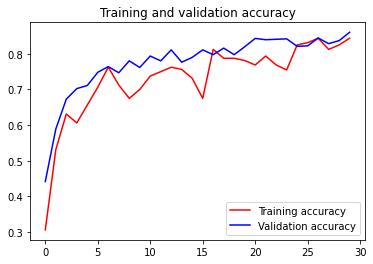

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.save("MobileNetV2_1.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
test = tf.keras.models.load_model('MobileNetV2_1.h5')

In [ ]:
global_average_layer1 = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
layer1 = tf.keras.layers.Dense(60 , activation='relu')

# **adding a dense neural network to MobilenetV2 model to prev model**

In [ ]:
prediction_layer1 = tf.keras.layers.Dense(5 , activation='softmax')

In [ ]:
model1 = tf.keras.Sequential([
  base_model,
  global_average_layer1,
  layer1 , 
  prediction_layer1
])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                76860     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 305       
Total params: 2,335,149
Trainable params: 77,165
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(
      train_generator,
      validation_data= test_generator , 
      steps_per_epoch=8,  
      epochs= 30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 15s 2s/step - loss: 1.6020 - accuracy: 0.2937 - val_loss: 1.2623 - val_accuracy: 0.4716
Epoch 2/30
8/8 [==============================] - 13s 2s/step - loss: 1.1724 - accuracy: 0.5562 - val_loss: 0.9463 - val_accuracy: 0.6691
Epoch 3/30
8/8 [==============================] - 11s 1s/step - loss: 0.9812 - accuracy: 0.6062 - val_loss: 0.7779 - val_accuracy: 0.7333
Epoch 4/30
8/8 [==============================] - 10s 1s/step - loss: 0.7435 - accuracy: 0.7437 - val_loss: 0.7084 - val_accuracy: 0.7469
Epoch 5/30
8/8 [==============================] - 13s 2s/step - loss: 0.7104 - accuracy: 0.7063 - val_loss: 0.6034 - val_accuracy: 0.7926
Epoch 6/30
8/8 [==============================] - 13s 2s/step - loss: 0.7508 - accuracy: 0.7125 - val_loss: 0.6152 - val_accuracy: 0.7926
Epoch 7/30
8/8 [==============================] - 12s 2s/step - loss: 0.5819 - accuracy: 0.7812 - val_loss: 0.5576 - val_accuracy: 0.8222
Epoch 8/30
8/8 [==================

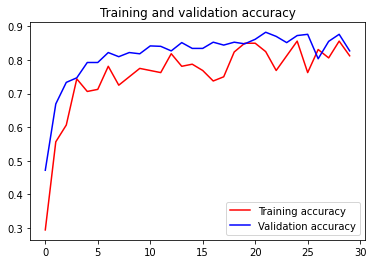

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model1.save("MobileNetV2_2.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# test = tf.keras.models.load_model('MobileNetV2_1.h5')

# **Using InceptionResnet_V2**

In [ ]:
base_model1 = tf.keras.applications.InceptionResNetV2( input_shape= IMG_SHAPE  , 
                                               include_top = False , 
                                                weights='imagenet')

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
base_model1.trainable = False

In [ ]:
global_average_layer2 = tf.keras.layers.GlobalAveragePooling2D()

In [ ]:
prediction_layer2 = tf.keras.layers.Dense(5 , activation='softmax')

In [ ]:
model2 = tf.keras.Sequential([
  base_model1,
  global_average_layer2,
  prediction_layer2
])

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
      train_generator,
      validation_data= test_generator , 
      steps_per_epoch=8,  
      epochs= 30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 24s 2s/step - loss: 1.5687 - accuracy: 0.3000 - val_loss: 1.4169 - val_accuracy: 0.4654
Epoch 2/30
8/8 [==============================] - 10s 1s/step - loss: 1.2848 - accuracy: 0.4812 - val_loss: 1.2304 - val_accuracy: 0.4679
Epoch 3/30
8/8 [==============================] - 10s 1s/step - loss: 1.1721 - accuracy: 0.5375 - val_loss: 1.0384 - val_accuracy: 0.6123
Epoch 4/30
8/8 [==============================] - 10s 1s/step - loss: 1.0670 - accuracy: 0.6000 - val_loss: 0.9724 - val_accuracy: 0.6580
Epoch 5/30
8/8 [==============================] - 10s 1s/step - loss: 1.1090 - accuracy: 0.5500 - val_loss: 0.9038 - val_accuracy: 0.6346
Epoch 6/30
8/8 [==============================] - 10s 1s/step - loss: 0.8563 - accuracy: 0.6625 - val_loss: 0.7880 - val_accuracy: 0.7222
Epoch 7/30
8/8 [==============================] - 11s 1s/step - loss: 0.8833 - accuracy: 0.7000 - val_loss: 0.7458 - val_accuracy: 0.7494
Epoch 8/30
8/8 [==================

In [ ]:
model2.save("InceptionResnet_V2_1.h5")

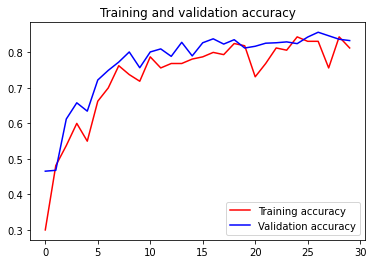

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# **adding a dense neural network in the InceptionResnet_V2 model **

In [ ]:
global_average_layer3 = tf.keras.layers.GlobalAveragePooling2D()
layer3 = tf.keras.layers.Dense(60 , activation='relu')
prediction_layer3 = tf.keras.layers.Dense(5 , activation='softmax')


In [ ]:
model3 = tf.keras.Sequential([
  base_model1,
  global_average_layer3,
  prediction_layer3
])

In [ ]:
model3.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(
      train_generator,
      validation_data= test_generator , 
      steps_per_epoch=8,  
      epochs= 30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 21s 2s/step - loss: 1.5790 - accuracy: 0.3000 - val_loss: 1.3062 - val_accuracy: 0.4593
Epoch 2/30
8/8 [==============================] - 10s 1s/step - loss: 1.2581 - accuracy: 0.5250 - val_loss: 1.0979 - val_accuracy: 0.6111
Epoch 3/30
8/8 [==============================] - 10s 1s/step - loss: 0.9521 - accuracy: 0.7312 - val_loss: 1.0491 - val_accuracy: 0.6235
Epoch 4/30
8/8 [==============================] - 10s 1s/step - loss: 0.9650 - accuracy: 0.6562 - val_loss: 0.8409 - val_accuracy: 0.7395
Epoch 5/30
8/8 [==============================] - 10s 1s/step - loss: 0.8565 - accuracy: 0.7000 - val_loss: 0.8303 - val_accuracy: 0.6728
Epoch 6/30
8/8 [==============================] - 9s 1s/step - loss: 0.7852 - accuracy: 0.6875 - val_loss: 0.7788 - val_accuracy: 0.7160
Epoch 7/30
8/8 [==============================] - 10s 1s/step - loss: 0.8878 - accuracy: 0.6625 - val_loss: 0.7136 - val_accuracy: 0.7716
Epoch 8/30
8/8 [===================

In [ ]:
model3.save("InceptionResnet_V2_2.h5")

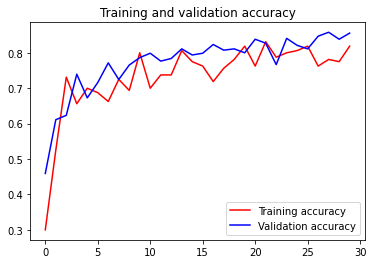

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# **Using ResNet101**

In [ ]:
base_model2 = tf.keras.applications.resnet.ResNet101(
    include_top=False , weights='imagenet', 
    input_shape=IMG_SHAPE
)

171450368/171446536 [==============================] - 1s 0us/step


In [ ]:
base_model2.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [ ]:
base_model2.trainable = False
global_average_layer4 = tf.keras.layers.GlobalAveragePooling2D()
# layer4 = tf.keras.layers.Dense(60 , activation='relu')
prediction_layer4 = tf.keras.layers.Dense(5 , activation='softmax')


In [ ]:
model4 = tf.keras.Sequential([
  base_model2,
  global_average_layer4,
  prediction_layer4
])

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 8, 8, 2048)        42658176  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 10245     
Total params: 42,668,421
Trainable params: 10,245
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(
      train_generator,
      validation_data= test_generator , 
      steps_per_epoch=8,  
      epochs= 30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 17s 2s/step - loss: 1.7166 - accuracy: 0.1500 - val_loss: 1.6455 - val_accuracy: 0.2049
Epoch 2/30
8/8 [==============================] - 9s 1s/step - loss: 1.6284 - accuracy: 0.2438 - val_loss: 1.6389 - val_accuracy: 0.2012
Epoch 3/30
8/8 [==============================] - 9s 1s/step - loss: 1.6319 - accuracy: 0.2125 - val_loss: 1.6478 - val_accuracy: 0.2049
Epoch 4/30
8/8 [==============================] - 9s 1s/step - loss: 1.6353 - accuracy: 0.1375 - val_loss: 1.6184 - val_accuracy: 0.1938
Epoch 5/30
8/8 [==============================] - 9s 1s/step - loss: 1.6244 - accuracy: 0.2438 - val_loss: 1.6283 - val_accuracy: 0.1938
Epoch 6/30
8/8 [==============================] - 9s 1s/step - loss: 1.6061 - accuracy: 0.2438 - val_loss: 1.6242 - val_accuracy: 0.2037
Epoch 7/30
8/8 [==============================] - 9s 1s/step - loss: 1.6186 - accuracy: 0.2375 - val_loss: 1.6114 - val_accuracy: 0.2012
Epoch 8/30
8/8 [========================

# **Using a dense neural network ResNet101**

In [ ]:
global_average_layer5 = tf.keras.layers.GlobalAveragePooling2D()
layer5 = tf.keras.layers.Dense(60 , activation='relu')
prediction_layer5 = tf.keras.layers.Dense(5 , activation='softmax')

In [ ]:
model5 = tf.keras.Sequential([
  base_model2,
  global_average_layer5,
  prediction_layer5
])

In [ ]:
model5.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(
      train_generator,
      validation_data= test_generator , 
      steps_per_epoch=8,  
      epochs= 30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 16s 1s/step - loss: 1.7855 - accuracy: 0.1750 - val_loss: 1.6189 - val_accuracy: 0.2049
Epoch 2/30
8/8 [==============================] - 9s 1s/step - loss: 1.6397 - accuracy: 0.1500 - val_loss: 1.6362 - val_accuracy: 0.1938
Epoch 3/30
8/8 [==============================] - 9s 1s/step - loss: 1.6351 - accuracy: 0.1750 - val_loss: 1.6085 - val_accuracy: 0.2049
Epoch 4/30
8/8 [==============================] - 9s 1s/step - loss: 1.6007 - accuracy: 0.2390 - val_loss: 1.6342 - val_accuracy: 0.2037
Epoch 5/30
8/8 [==============================] - 9s 1s/step - loss: 1.6462 - accuracy: 0.2000 - val_loss: 1.6142 - val_accuracy: 0.1938
Epoch 6/30
8/8 [==============================] - 9s 1s/step - loss: 1.6274 - accuracy: 0.1937 - val_loss: 1.6480 - val_accuracy: 0.2012
Epoch 7/30
8/8 [==============================] - 9s 1s/step - loss: 1.6425 - accuracy: 0.2062 - val_loss: 1.6228 - val_accuracy: 0.2185
Epoch 8/30
8/8 [========================


ResNet101 worked poorly with respect to Mobilenetv2 and inceptionResnet .... 

